In [1]:
#Importing neccessary libraries

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

import re    # for regular expressions 
import nltk  # for text manipulation 

In [2]:
train_data  = pd.read_csv('train_tweets.csv') 
test_data = pd.read_csv('test_tweets.csv')

In [3]:
pd.set_option('display.max_colwidth', 400)

In [5]:
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [10]:
train_data.shape

(31962, 3)

In [9]:
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [11]:
test_data.shape

(17197, 2)

In [12]:
train_data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

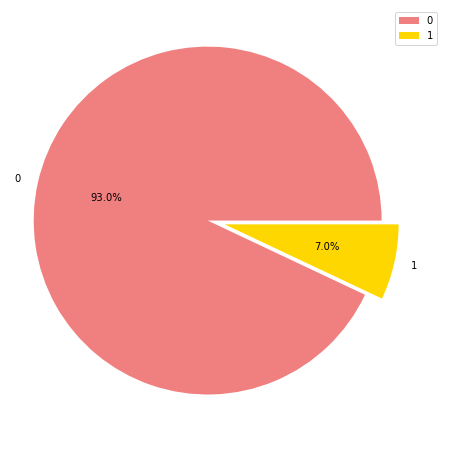

In [18]:
#Showing the fraction of labels for training data

plt.figure(figsize=(8,8))
plt.pie(train_data['label'].value_counts(), labels=train_data['label'].unique(), 
        autopct='%1.1f%%', explode = (0.1, 0), colors=['lightcoral', 'gold'])
plt.legend()
plt.show()

In [19]:
#Finding the length of tweets

length_train= train_data['tweet'].str.len()
length_test= test_data['tweet'].str.len()

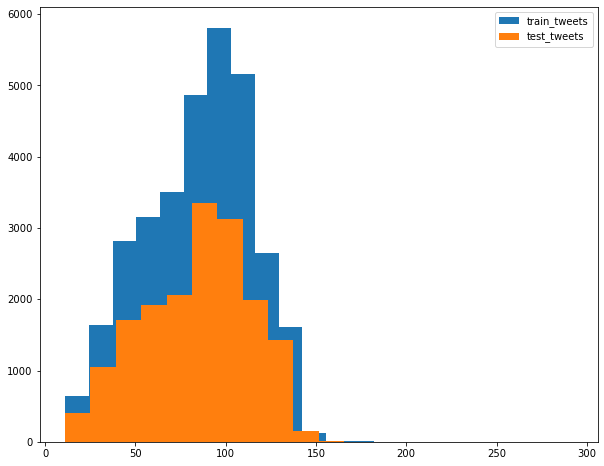

In [24]:
#Showing the frequency (in terms of length (no. of words)) of tweets on both training and testing data

plt.figure(figsize=(10,8))
plt.hist(length_train, bins=20, label='train_tweets')
plt.hist(length_test, bins=20, label='test_tweets')
plt.legend()
plt.show()

In [26]:
#Combine the training and testing data

combi= train_data.append(test_data, ignore_index=True)
combi.shape

(49159, 3)

In [27]:
#Training % data
(31962/49159)*100

65.01759596411644

In [28]:
#Testing % data
(17197/49159)*100

34.98240403588356

In [29]:
combi.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation


In [30]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dinesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
## 1. Removing Twitter Handles (@user)
## 2. Removing Punctuations, Numbers, and Special Characters
## 3. Removing Short Words (less than 3 characters), Stop words and perform Stemming

corpus= []
for i in range(0, len(combi)):
    combi['tweet'][i]= re.sub('@[\w]*', '', combi['tweet'][i])
    review = re.sub('[^a-zA-Z#]', ' ', combi['tweet'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if len(word)> 3 if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

C:\Users\Dinesh\Anaconda3\envs\tensorflow_cpu\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [32]:
corpus

['father dysfunct selfish drag kid dysfunct #run',
 'thank #lyft credit caus offer wheelchair van #disapoint #getthank',
 'bihday majesti',
 '#model love take time',
 'factsguid societi #motiv',
 'huge fare talk leav chao disput #allshowandnogo',
 'camp tomorrow danni',
 'next school year year exam think #school #exam #hate #imagin #actorslif #revolutionschool #girl',
 'love land #allin #cav #champion #cleveland #clevelandcavali',
 'welcom',
 '#ireland consum price index climb previou #blog #silver #gold #forex',
 'selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love',
 'daddi today day #gettingf',
 '#cnn call #michigan middl school build wall chant #tcot',
 'comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin',
 'ouch junior angri #got #junior #yugyoem #omg',
 'thank paner #thank #posit',
 'retweet agre',
 '#friday smile around user #cooki make peopl',
 'know essenti oil made chemic',
 '#euro peo

In [33]:
combi['tweet'] = corpus

In [34]:
combi.head()

,id,label,tweet
0,1,0.0,father dysfunct selfish drag kid dysfunct #run
1,2,0.0,thank #lyft credit caus offer wheelchair van #disapoint #getthank
2,3,0.0,bihday majesti
3,4,0.0,#model love take time
4,5,0.0,factsguid societi #motiv


In [35]:
combi.shape

(49159, 3)

In [40]:
# Extracting hashtags words from non racist/sexist tweets 
ht_positive= []
for i in range(0, len(combi)):
    if combi['label'][i] == 0:
        ht= re.findall(r'#(\w+)', combi['tweet'][i])
        ht_positive.append(ht)

ht_positive= sum(ht_positive, [])
ht_positive

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughisenough',
 'dontph

In [38]:
# Extracting hashtags words from racist/sexist tweets 
ht_negative= []
for i in range(0, len(combi)):
    if combi['label'][i] == 1:
        ht= re.findall(r'#(\w+)', combi['tweet'][i])
        ht_negative.append(ht)

ht_negative= sum(ht_negative, [])
ht_negative

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'med',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflict',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'offic',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'blacklivesmatt',
 'feminismiscanc

In [42]:
#Extracing frequest positive/negative words

positive_freq= nltk.FreqDist(ht_positive)
negative_freq= nltk.FreqDist(ht_negative)


In [45]:
positive_freq

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

In [46]:
negative_freq

FreqDist({'trump': 136, 'polit': 95, 'allahsoil': 92, 'liber': 81, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

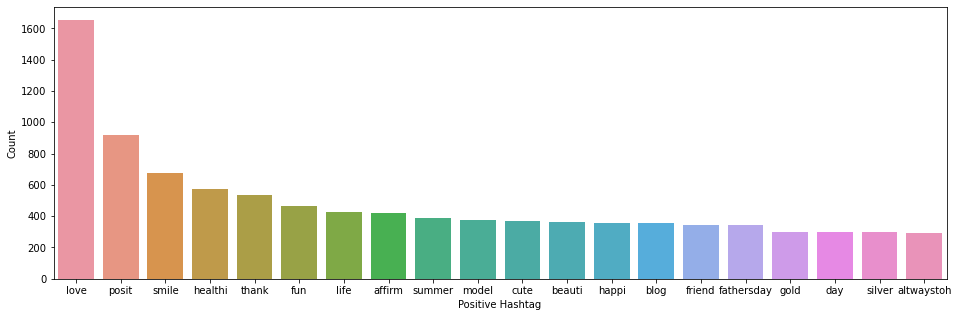

In [54]:
#Showing the counts of frequest positive words

plt.figure(figsize=(16,5))

positive = pd.DataFrame({'Positive Hashtag': list(positive_freq.keys()), 'Count': list(positive_freq.values())})
#positive

# Selecting top 20 most frequent hashtags     
positive = positive.nlargest(columns="Count", n = 20) 
sns.barplot(data=positive, x= "Positive Hashtag", y = "Count")
plt.show()

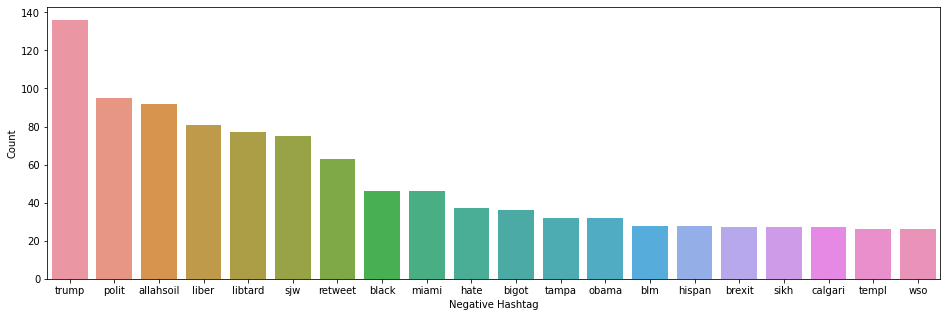

In [55]:
plt.figure(figsize=(16,5))

negative = pd.DataFrame({'Negative Hashtag': list(negative_freq.keys()), 'Count': list(negative_freq.values())})

# Selecting top 20 most frequent hashtags     
negative = negative.nlargest(columns="Count", n = 20) 
sns.barplot(data=negative, x= "Negative Hashtag", y = "Count")
plt.show()

In [141]:
## Applying CountVectorizer
## Creating the Bag of Words model

In [81]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer(max_features=1000, ngram_range=(1,3))
tf = TfidfVectorizer(max_features=1000, ngram_range=(1,3))

In [82]:
bow = tf.fit_transform(combi['tweet'])

In [83]:
bow.shape

(49159, 1000)

In [84]:
train_bow= bow[:31962, :]
test_bow= bow[31962:, :]

In [85]:
y= train_data['label']

In [86]:
pickle.dump(cv, open('transform.pkl', 'wb'))

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(train_bow, y, test_size= 0.3)

## Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [90]:
y_pred= lr.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [92]:
confusion_matrix(y_test, y_pred)

array([[8879,   53],
       [ 438,  219]], dtype=int64)

In [93]:
accuracy_score(y_test, y_pred)

0.948795494837835

## Multinomial NaiveBayes

In [94]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [95]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [96]:
confusion_matrix(y_test, y_pred)

array([[8894,   38],
       [ 497,  160]], dtype=int64)

In [97]:
accuracy_score(y_test, y_pred)

0.9442069037438732

In [71]:
#Now make predictions for the test dataset

test_pred= lr.predict(test_bow)
test_data['label']= test_pred
test_data

,id,tweet,label
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,0
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,0
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,0
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",0
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",0
...,...,...,...
17192,49155,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,1
17193,49156,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,0
17194,49157,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",0
17195,49158,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",0


In [72]:
test_data['label'].value_counts()

0    16598
1      599
Name: label, dtype: int64

In [78]:
import pickle
filename = 'twitter-sentiment-analysis.pkl'
pickle.dump(lr, open(filename, 'wb'))